# 概要

* アタポンの1位データに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* イベント期間(h)を使って、ローカルレベル+時変係数モデルにしてみる

# インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])
from sklearn.metrics import r2_score

import pystan

# イベントデータ読み込み

In [2]:
input_dir = './data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,1位,2001位,形式,属性,期間
日付,,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,324369,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,350000,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,520000,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,602529,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,523819,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,530000,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,666666,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,844167,58517,アタポン,NaN,198.0


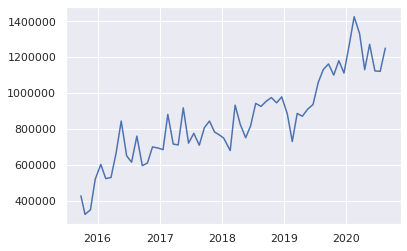

In [4]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '1位']
ax.plot(x, y)
plt.show()

# stanデータ準備

In [5]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'len':     df['期間'].tolist(),   # イベント期間(h)
    'y':       df['1位'].tolist(), # 観測値
}

In [6]:
# Stanコード
model = """
data {
  int T;         // データ取得期間の長さ
  vector[T] len; // イベント期間(h)
  vector[T] y;   // 観測値
}
parameters {
  vector[T] b_len;   // lenの係数
  vector[T] mu;      // 水準成分の推定値
  real<lower=0> s_t; // ev_lenの係数の変化を表す標準偏差
  real<lower=0> s_w; // 水準成分の変動の大きさを表す標準偏差
  real<lower=0> s_v; // 観測誤差の標準偏差
}
transformed parameters {
  vector[T] alpha;
  for(i in 1:T){
    alpha[i] = mu[i] + b_len[i] * len[i];
  }
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1], s_w);
    b_len[i] ~ normal(b_len[i-1], s_t);
    y[i] ~ normal(alpha[i], s_v);
  }
}
"""

# Stan実行

In [7]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_63f10cc5788edc3d10735e32da228d2c NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpve0h0vwp\stanfit4anon_model_63f10cc5788edc3d10735e32da228d2c_6919367417000425032.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 23 s


In [8]:
# パラメータ設定
n_itr = 4000
n_warmup = n_itr - 1000
chains = 3

In [9]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

C:\Users\kazuy\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


Wall time: 36.6 s


In [10]:
# ファイル保存
save_dir = './data/'
with open(save_dir + 'c4_model.pickle', mode="wb") as f:
    pickle.dump(stm, f)
with open(save_dir + 'c4_fit.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  


# 結果確認

In [11]:
fit

Inference for Stan model: anon_model_63f10cc5788edc3d10735e32da228d2c.
3 chains, each with iter=4000; warmup=3000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b_len[0]  1117.7   59.04 769.78 -461.2  598.8 1107.9 1609.7 2639.2    170   1.02
b_len[1]  1117.2   59.01 708.14 -317.6 643.34 1084.5 1585.2 2545.2    144   1.02
b_len[2]  1378.7   59.27 721.05 -164.7 909.14 1352.1 1868.6 2772.8    148   1.02
b_len[3]  1677.5    49.2 602.57 435.95 1285.1 1650.5 2070.6 2879.4    150   1.03
b_len[4]  2135.6   52.92  626.2 860.46 1734.0 2115.4 2540.1 3365.6    140   1.03
b_len[5]  2085.2   54.17 643.26 729.98 1671.0 2094.6 2501.7 3368.8    141   1.04
b_len[6]  2197.0   54.22 643.83 882.28 1772.7 2208.1 2616.3 3470.2    141   1.04
b_len[7]  2617.2   53.44 623.19 1326.7 2216.3 2612.9 3032.0 3870.2    136   1.04
b_len[8]  2923.1   51.66 589.06 1771.8 2533.9 2932.1 3319.0 4093.5    130   1.03
b

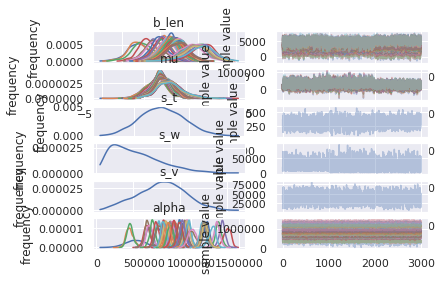

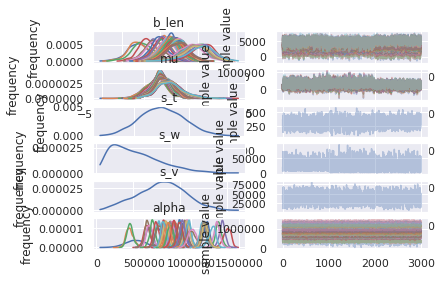

In [12]:
fit.plot()

In [13]:
#x軸
X = df.index

#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

# alpha
# 事後平均
alpha_mean = ms['alpha'].mean(axis=0)
# #95パーセンタイル抽出
alpha_5 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 5), axis=0))
alpha_95 = np.array(pd.DataFrame(ms['alpha']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_len
# 事後平均
b_len_mean = ms['b_len'].mean(axis=0)
# #95パーセンタイル抽出
b_len_5 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 5), axis=0))
b_len_95 = np.array(pd.DataFrame(ms['b_len']).apply(lambda x: np.percentile(x, 95), axis=0))

# b_ev_lenの効果を算出
len_effects = b_len_mean*df['期間']
len_effects_5 = b_len_5*df['期間']
len_effects_95 = b_len_95*df['期間']

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


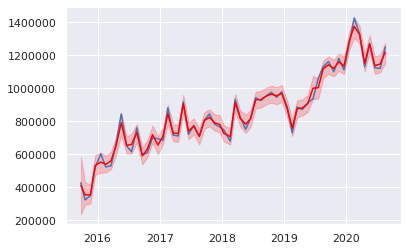

In [14]:
# alpha
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, alpha_mean, label='predicted', c='red')
plt.fill_between(X, alpha_5, alpha_95, color='red', alpha=0.2)
plt.show()

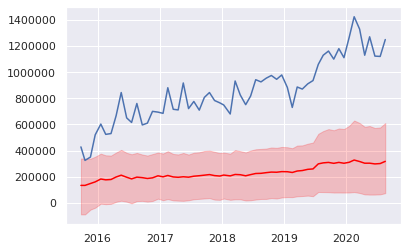

In [15]:
# mu
# トレンド成分
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['1位'], label='observed')
ax.plot(X, mu_mean, label='trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

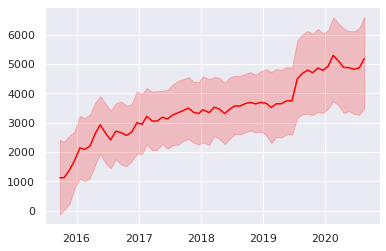

In [16]:
# b_ev_len
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, b_len_mean, c='red')
plt.fill_between(X, b_len_5, b_len_95, color='red', alpha=0.2)
plt.show()

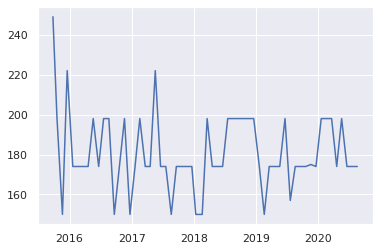

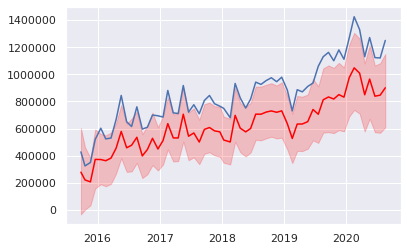

In [17]:
# b_ev_lenの効果を算出
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['期間'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, df['1位'], label='observed')
ax.plot(X, len_effects, c='red')
plt.fill_between(X, len_effects_5, len_effects_95, color='red', alpha=0.2)
plt.show()

# 残差確認

In [18]:
df['predict'] = alpha_mean
# 予測とのズレ（比）
df['diff'] = df['1位'] - df['predict']
df.drop(['2001位', '形式', '属性'], axis=1, inplace=True)

In [19]:
df.head()

,イベント,1位,期間,predict,diff
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,427777,249.0,411313.191550,16463.808450
2015-10-19,Nation Blue,324369,198.0,354170.608648,-29801.608648
2015-11-20,Orange Sapphire,350000,150.0,354223.986233,-4223.986233
2015-12-18,Snow Wings,520000,222.0,532322.624260,-12322.624260
2016-01-20,パステルピンクな恋,602529,174.0,553457.009869,49071.990131


In [20]:
# 決定係数 (R2)
r2_score(df['1位'], df['predict']) 

0.9897364605262704

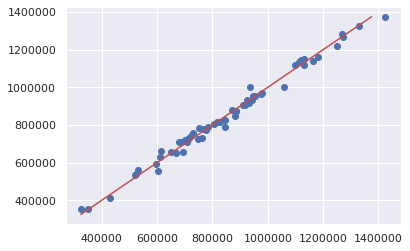

In [21]:
fig, ax = plt.subplots(1, 1)
ax.scatter(df['1位'], df['predict'])
ideal_min = min(df['1位'].min(), df['predict'].min())
ideal_max = min(df['1位'].max(), df['predict'].max())
ax.plot([ideal_min, ideal_max], [ideal_min, ideal_max], color='r')
plt.show()

In [22]:
df.corr()

,1位,期間,predict,diff
1位,1.000000,0.100235,0.994960,0.240761
期間,0.100235,1.000000,0.098609,0.034985
predict,0.994960,0.098609,1.000000,0.142226
diff,0.240761,0.034985,0.142226,1.000000


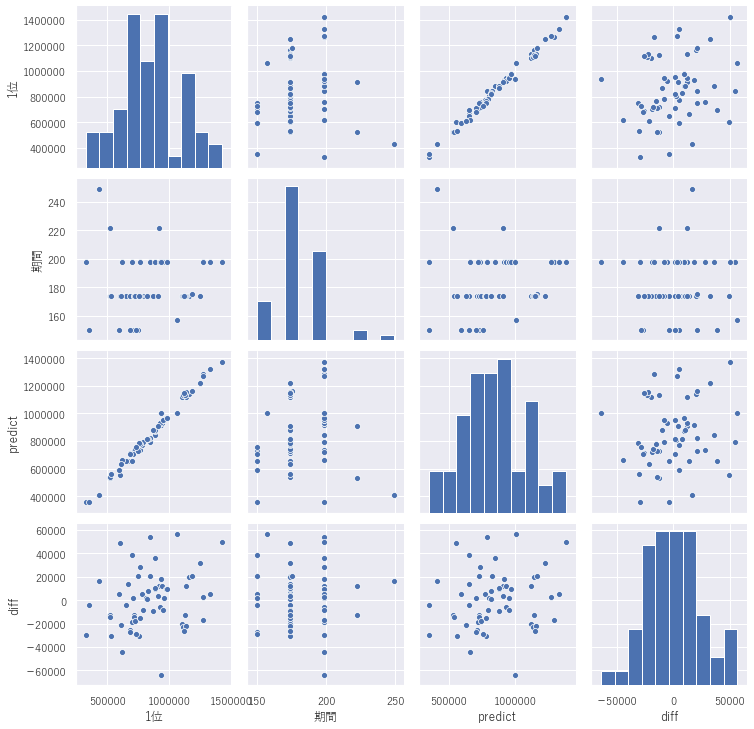

In [23]:
sns.set(font='Yu Gothic')
sns.pairplot(df)